In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Importing dataset and important libraries**

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/Crop_Recommendation.csv")
df.head(5)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [108]:
pivot=df.pivot_table(values=["Nitrogen","Temperature","Rainfall"],index=["Crop","pH_Value"],aggfunc=(np.mean))
pivot

Nitrogen    Rainfall  Temperature
Crop       pH_Value                                   
Apple      5.514253         7  104.911666    23.881246
           5.520783         0  113.976046    21.225034
           5.521467        24  110.431786    22.750888
           5.534567         2  105.050823    22.697801
           5.554824        31  120.058667    21.801298
...                       ...         ...          ...
Watermelon 6.932740        93   41.875400    26.587407
           6.936998       101   57.573432    25.542169
           6.940236        80   48.478333    25.504055
           6.944640        92   51.510336    26.706078
           6.956509        92   54.387485    26.275206

[2200 rows x 3 columns]

In [109]:
from sklearn.preprocessing import LabelEncoder
label_encoder={}
label_encoder["Crop"]=LabelEncoder()
df["Crop"]=label_encoder["Crop"].fit_transform(df["Crop"])
x=df.iloc[:,0:2]
y=df.iloc[:,7:]
y

,Crop
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [110]:
from sklearn.naive_bayes import GaussianNB
nbmodel=GaussianNB()
nbmodel.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

#**Basic EDA**

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


In [112]:
df.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop             int64
dtype: object

In [113]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [114]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [115]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


<Axes: xlabel='Rainfall', ylabel='Count'>

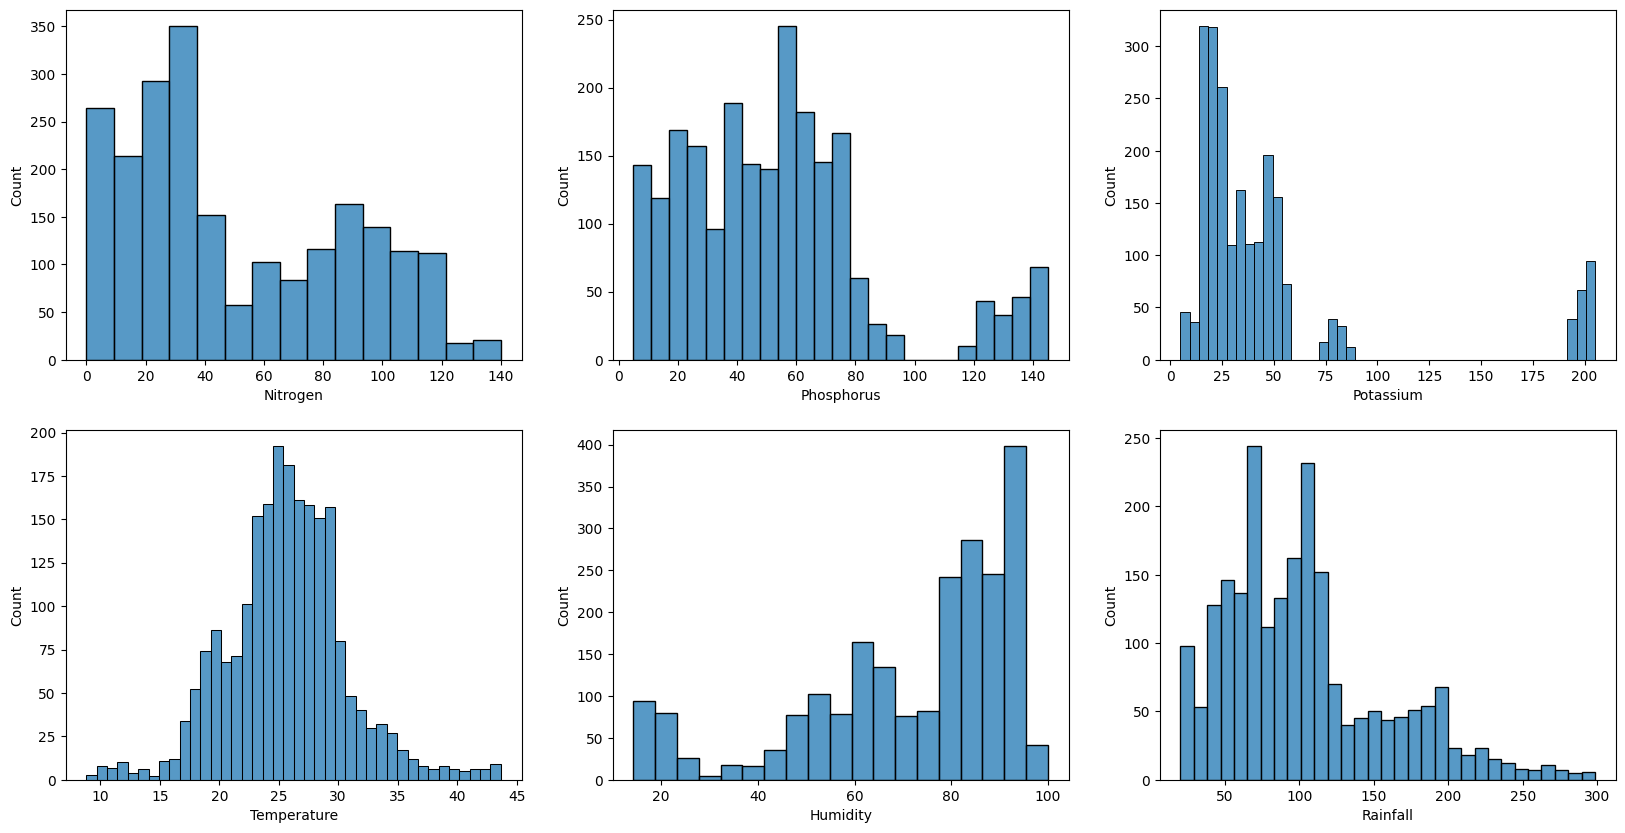

In [116]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,3,figsize=(20,10))
sns.histplot(df["Nitrogen"],ax=axes[0,0])
sns.histplot(df["Phosphorus"],ax=axes[0,1])
sns.histplot(df["Potassium"],ax=axes[0,2])
sns.histplot(df["Temperature"],ax=axes[1,0])
sns.histplot(df["Humidity"],ax=axes[1,1])
sns.histplot(df["Rainfall"],ax=axes[1,2])

<Axes: >

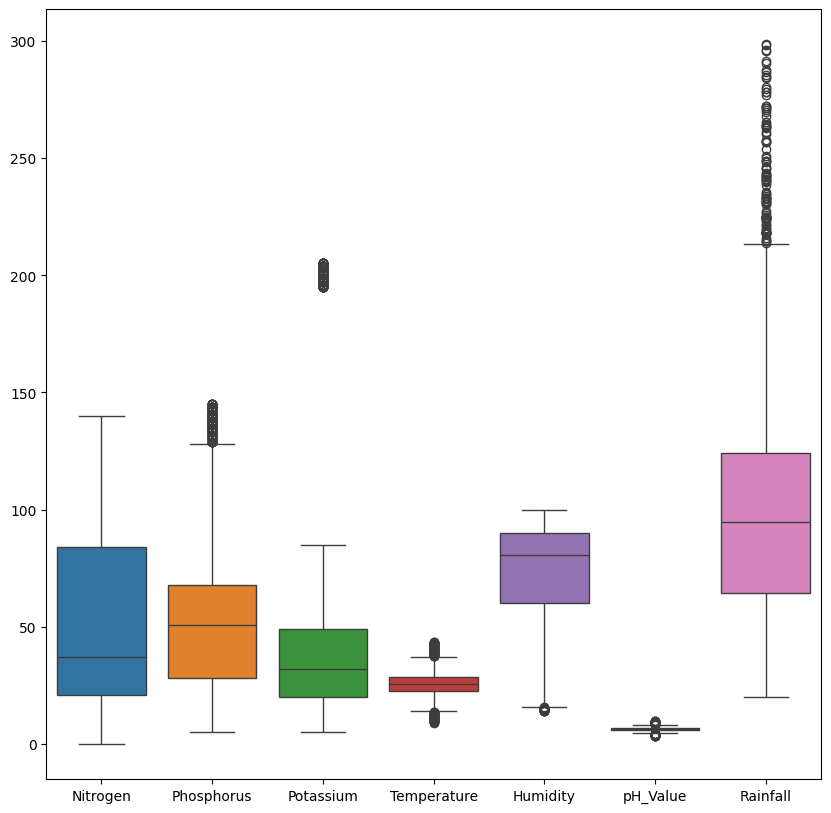

In [117]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df.iloc[:,0:7])

**This BoxPlot represents multiple parameters for each variables ( minimum value,maximum value, quartiles) but it also has too many outliers (outliers are something which lies outside the range and can affect analysis)**

In [124]:
for columns in df.iloc[:,0:7].columns:
  q1=df[column].quantile(0.25)
  q3 = df["Rainfall"].quantile(0.75)
  iqr=q3-q1
  ub=q3+1.5*iqr
  lb=q1-1.5*iqr
  df = df[(df["Rainfall"] > lb) & (df["Rainfall"] < ub)]



<Axes: >

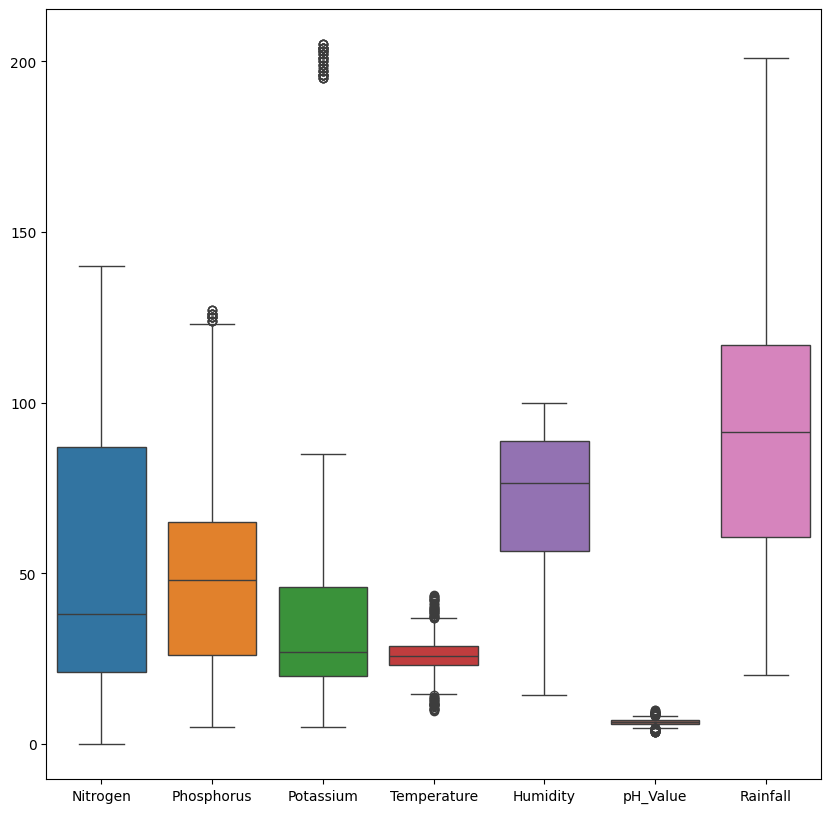

In [125]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df.iloc[:,0:7])

#**Train test split**

In [90]:
x=df.iloc[:,0:7]
y=df.iloc[:,7:]


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#**Feature scaling**

In [43]:
x_cols=x.columns
x_cols

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')

In [46]:
scaler=StandardScaler().fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_cols)

In [47]:
scaler=StandardScaler().fit(x_test)
x_test=scaler.transform(x_test)
x_test_scaled=pd.DataFrame(x_test,columns=x_cols)

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model.fit(x_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=knn_model.predict(x_test_scaled)
accuracy_scores_list=[]

#**Predicting Test Data**

In [ ]:
test_data=np.array([[90,42,43,20.87,82.00,6.50,202.9355],[20,100,41,61.54,81.21,4.2,9.655],[50,43,78,19.54,70.54,5.76,30.54]])
knn_model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Rice', 'Grapes', 'Apple'], dtype=object)

#**Evaluation Metrices for k=3**

In [ ]:
print("Accuracy Score:",accuracy_score(y_pred,y_test))


Accuracy Score: 0.9742424242424242


In [ ]:
print("Classification Report:\n",classification_report(y_pred,y_test))

Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        28
      Banana       1.00      1.00      1.00        30
   Blackgram       0.97      0.97      0.97        31
    ChickPea       1.00      1.00      1.00        34
     Coconut       0.96      1.00      0.98        25
      Coffee       1.00      1.00      1.00        29
      Cotton       1.00      0.97      0.98        29
      Grapes       1.00      1.00      1.00        30
        Jute       0.94      0.83      0.88        35
 KidneyBeans       1.00      0.96      0.98        27
      Lentil       1.00      0.92      0.96        24
       Maize       0.96      1.00      0.98        26
       Mango       1.00      0.97      0.98        29
   MothBeans       0.89      1.00      0.94        32
    MungBean       1.00      1.00      1.00        29
   Muskmelon       1.00      1.00      1.00        30
      Orange       0.97      1.00      0.99        33
   

In [ ]:
conf_mat=confusion_matrix(y_pred,y_test)

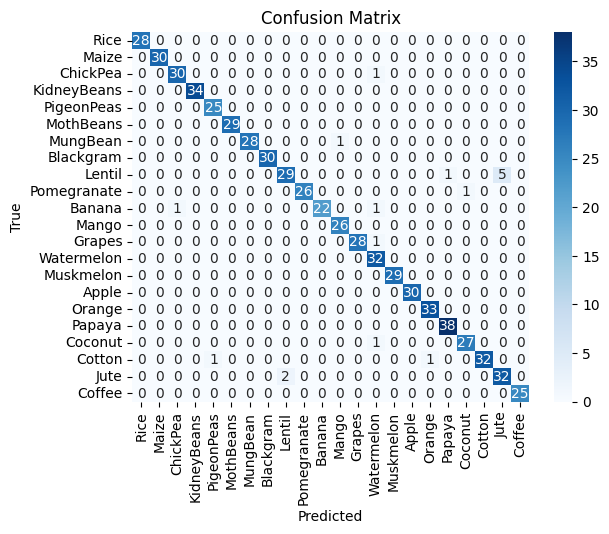

In [ ]:
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=df["Crop"].unique(), yticklabels=df["Crop"].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#**Evaluation Metrices for k=5**

Accuracy Score: 0.9757575757575757
Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        28
      Banana       1.00      1.00      1.00        30
   Blackgram       0.97      0.97      0.97        31
    ChickPea       1.00      1.00      1.00        34
     Coconut       0.96      1.00      0.98        25
      Coffee       1.00      1.00      1.00        29
      Cotton       1.00      0.97      0.98        29
      Grapes       1.00      1.00      1.00        30
        Jute       1.00      0.82      0.90        38
 KidneyBeans       1.00      0.93      0.96        28
      Lentil       1.00      0.92      0.96        24
       Maize       0.96      1.00      0.98        26
       Mango       1.00      1.00      1.00        28
   MothBeans       0.94      1.00      0.97        34
    MungBean       1.00      1.00      1.00        29
   Muskmelon       1.00      1.00      1.00        30
      Orange       0.9

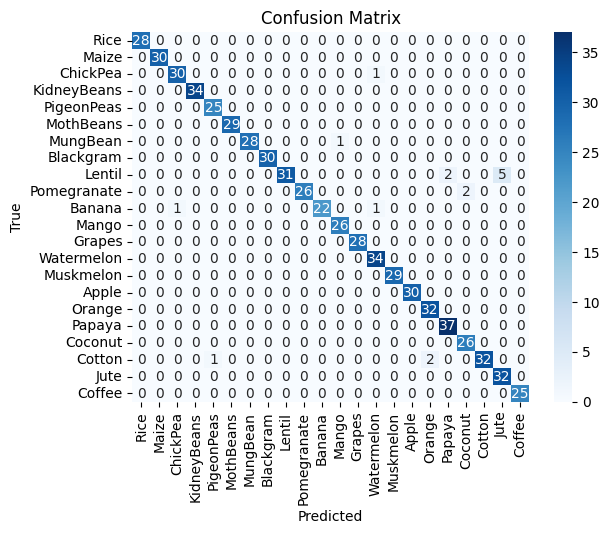

In [ ]:
print("Accuracy Score:",accuracy_score(y_pred,y_test))
accuracy_scores_list.append(accuracy_score(y_pred,y_test))
print("Classification Report:\n",classification_report(y_pred,y_test))
conf_mat=confusion_matrix(y_pred,y_test)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=df["Crop"].unique(), yticklabels=df["Crop"].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#**Evaluation Metrics for k=7**

Accuracy Score: 0.9681818181818181
Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        28
      Banana       1.00      1.00      1.00        30
   Blackgram       0.94      0.97      0.95        30
    ChickPea       1.00      1.00      1.00        34
     Coconut       0.96      1.00      0.98        25
      Coffee       1.00      1.00      1.00        29
      Cotton       1.00      0.97      0.98        29
      Grapes       1.00      1.00      1.00        30
        Jute       1.00      0.78      0.87        40
 KidneyBeans       1.00      0.93      0.96        28
      Lentil       1.00      0.85      0.92        26
       Maize       0.96      1.00      0.98        26
       Mango       1.00      0.97      0.98        29
   MothBeans       0.92      1.00      0.96        33
    MungBean       1.00      1.00      1.00        29
   Muskmelon       1.00      1.00      1.00        30
      Orange       0.9

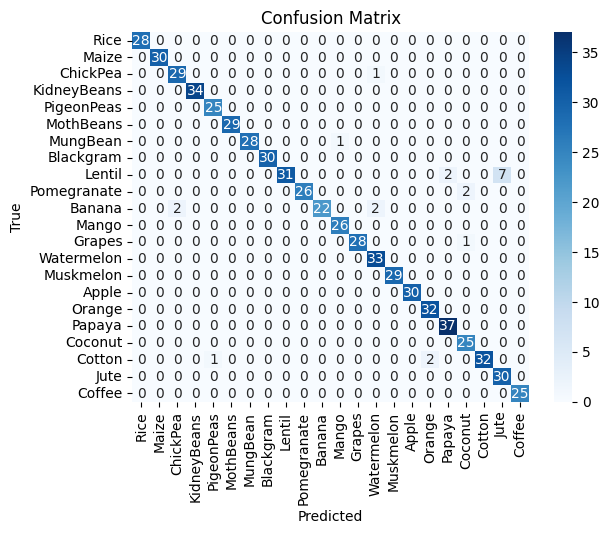

In [ ]:
print("Accuracy Score:",accuracy_score(y_pred,y_test))
accuracy_scores_list.append(accuracy_score(y_pred,y_test))

print("Classification Report:\n",classification_report(y_pred,y_test))
conf_mat=confusion_matrix(y_pred,y_test)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=df["Crop"].unique(), yticklabels=df["Crop"].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#**Evaluation metrics for k=13**

Accuracy Score: 0.9484848484848485
Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        28
      Banana       1.00      1.00      1.00        30
   Blackgram       0.94      0.88      0.91        33
    ChickPea       1.00      1.00      1.00        34
     Coconut       0.96      0.93      0.94        27
      Coffee       1.00      1.00      1.00        29
      Cotton       1.00      0.97      0.98        29
      Grapes       1.00      1.00      1.00        30
        Jute       1.00      0.70      0.83        44
 KidneyBeans       1.00      0.93      0.96        28
      Lentil       0.95      0.84      0.89        25
       Maize       0.96      1.00      0.98        26
       Mango       1.00      0.93      0.97        30
   MothBeans       0.89      1.00      0.94        32
    MungBean       1.00      1.00      1.00        29
   Muskmelon       1.00      1.00      1.00        30
      Orange       0.8

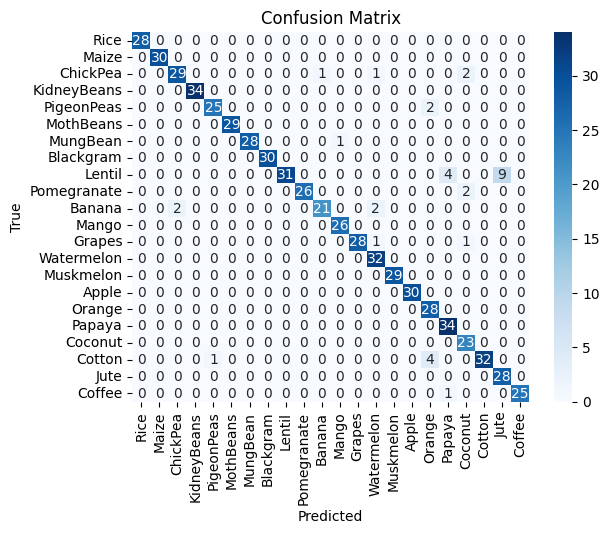

In [ ]:
print("Accuracy Score:",accuracy_score(y_pred,y_test))
accuracy_scores_list.append(accuracy_score(y_pred,y_test))

print("Classification Report:\n",classification_report(y_pred,y_test))
conf_mat=confusion_matrix(y_pred,y_test)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=df["Crop"].unique(), yticklabels=df["Crop"].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#**Relation between k values and accuracy score**

Text(0, 0.5, 'Accuracy Scores')

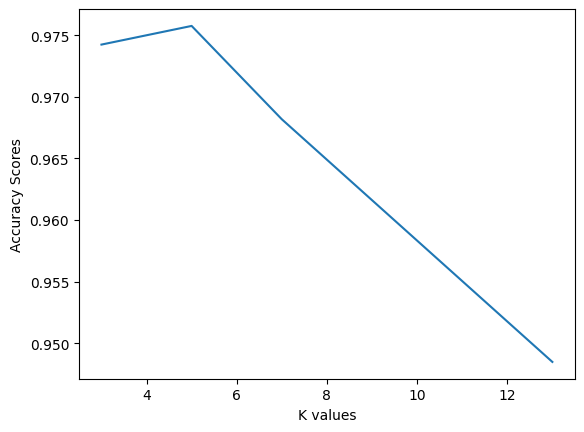

In [ ]:
accuracy_scores_list=[0.9742424242424242,0.9757575757575757,0.9681818181818181,0.9484848484848485]
k_list=[3,5,7,13]

plt.plot( k_list,accuracy_scores_list)
plt.xlabel("K values")
plt.ylabel("Accuracy Scores")



**Visualisation for train and test data**

In [ ]:
x_train_scaled

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,1.142951,0.074266,-0.118775,-0.317172,0.491802,1.197116,1.671109
1,0.846649,-0.861209,0.057688,-0.225311,0.728431,-0.527622,-0.998475
2,-1.254406,-1.434564,-0.805019,-0.487779,0.892705,0.308918,0.174128
3,-1.173596,0.285502,-0.471700,-0.498969,-2.131779,-0.811783,0.084363
4,-1.011976,-0.921562,-0.824626,-0.296179,0.854222,1.174150,-0.007098
...,...,...,...,...,...,...,...
1535,1.385381,0.526915,-0.001133,0.649015,0.359303,-1.027086,-0.011321
1536,-0.446308,0.436385,0.057688,0.385741,1.030666,0.280183,-1.139435
1537,-0.419371,0.315679,-0.648163,0.612735,-0.350847,0.033782,-0.609524
1538,-0.311625,0.345855,-0.491307,0.000510,-0.098810,1.596745,-1.127169


<Axes: >

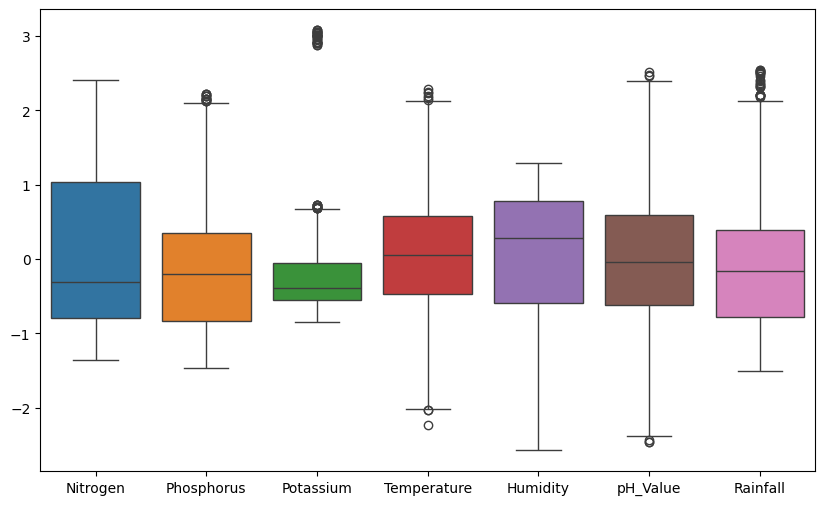

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(data=x_train_scaled)

<Axes: xlabel='Rainfall', ylabel='Count'>

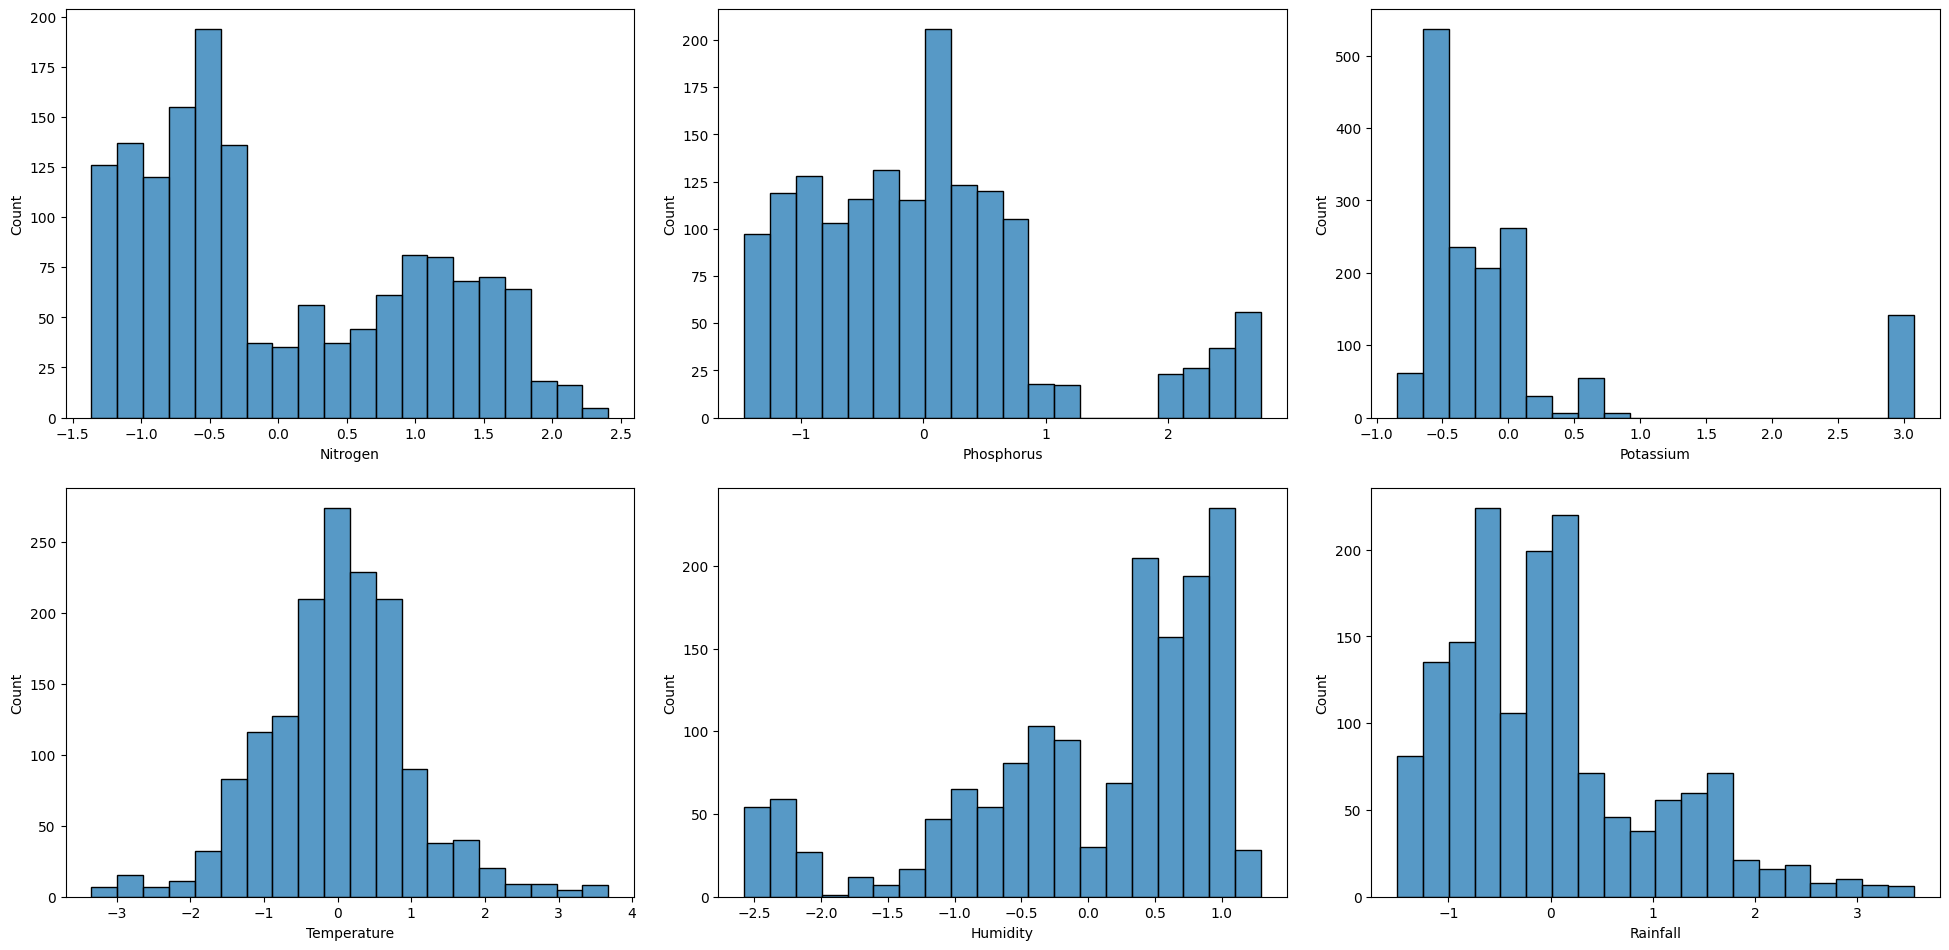

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
plt.tight_layout(pad=3)
sns.histplot(x_train_scaled["Nitrogen"],bins=20,ax=axes[0,0])
sns.histplot(x_train_scaled["Phosphorus"],bins=20,ax=axes[0,1])
sns.histplot(x_train_scaled["Potassium"],bins=20,ax=axes[0,2])
sns.histplot(x_train_scaled["Temperature"],bins=20,ax=axes[1,0])
sns.histplot(x_train_scaled["Humidity"],bins=20,ax=axes[1,1])
sns.histplot(x_train_scaled["Rainfall"],bins=20,ax=axes[1,2])

In [ ]:
x_test_scaled

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,1.496852,-1.194884,0.032908,0.032122,0.705239,-0.047890,-0.817357
1,1.112254,-1.256236,-0.047459,-0.266537,0.607679,-0.140882,-1.024840
2,-1.003035,2.087468,3.106948,-3.104235,0.529607,-0.370240,-0.546507
3,0.040874,0.615011,0.615569,-1.671469,-2.367251,1.711782,-0.189132
4,-0.508552,0.400278,-0.630120,1.692833,-0.294010,0.872384,-0.625569
...,...,...,...,...,...,...,...
655,-0.316253,-1.102855,-0.067551,-1.511856,0.827061,0.577885,0.009852
656,-0.453609,-1.286912,-0.770763,1.084953,1.013078,1.119816,0.198556
657,-0.838207,2.118144,3.127040,-2.709930,0.401055,0.036693,-0.718337
658,0.095817,0.430954,0.073091,1.831684,0.955625,0.158938,0.676657


<Axes: >

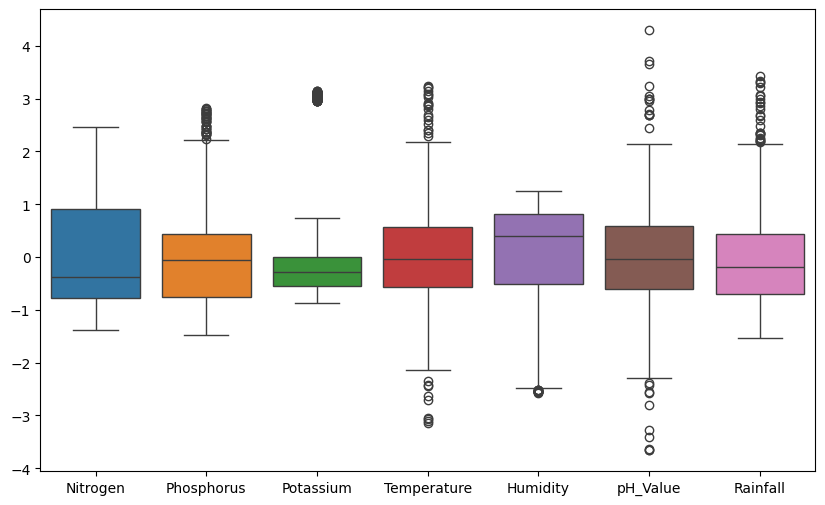

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=x_test_scaled)

<Axes: xlabel='Rainfall', ylabel='Count'>

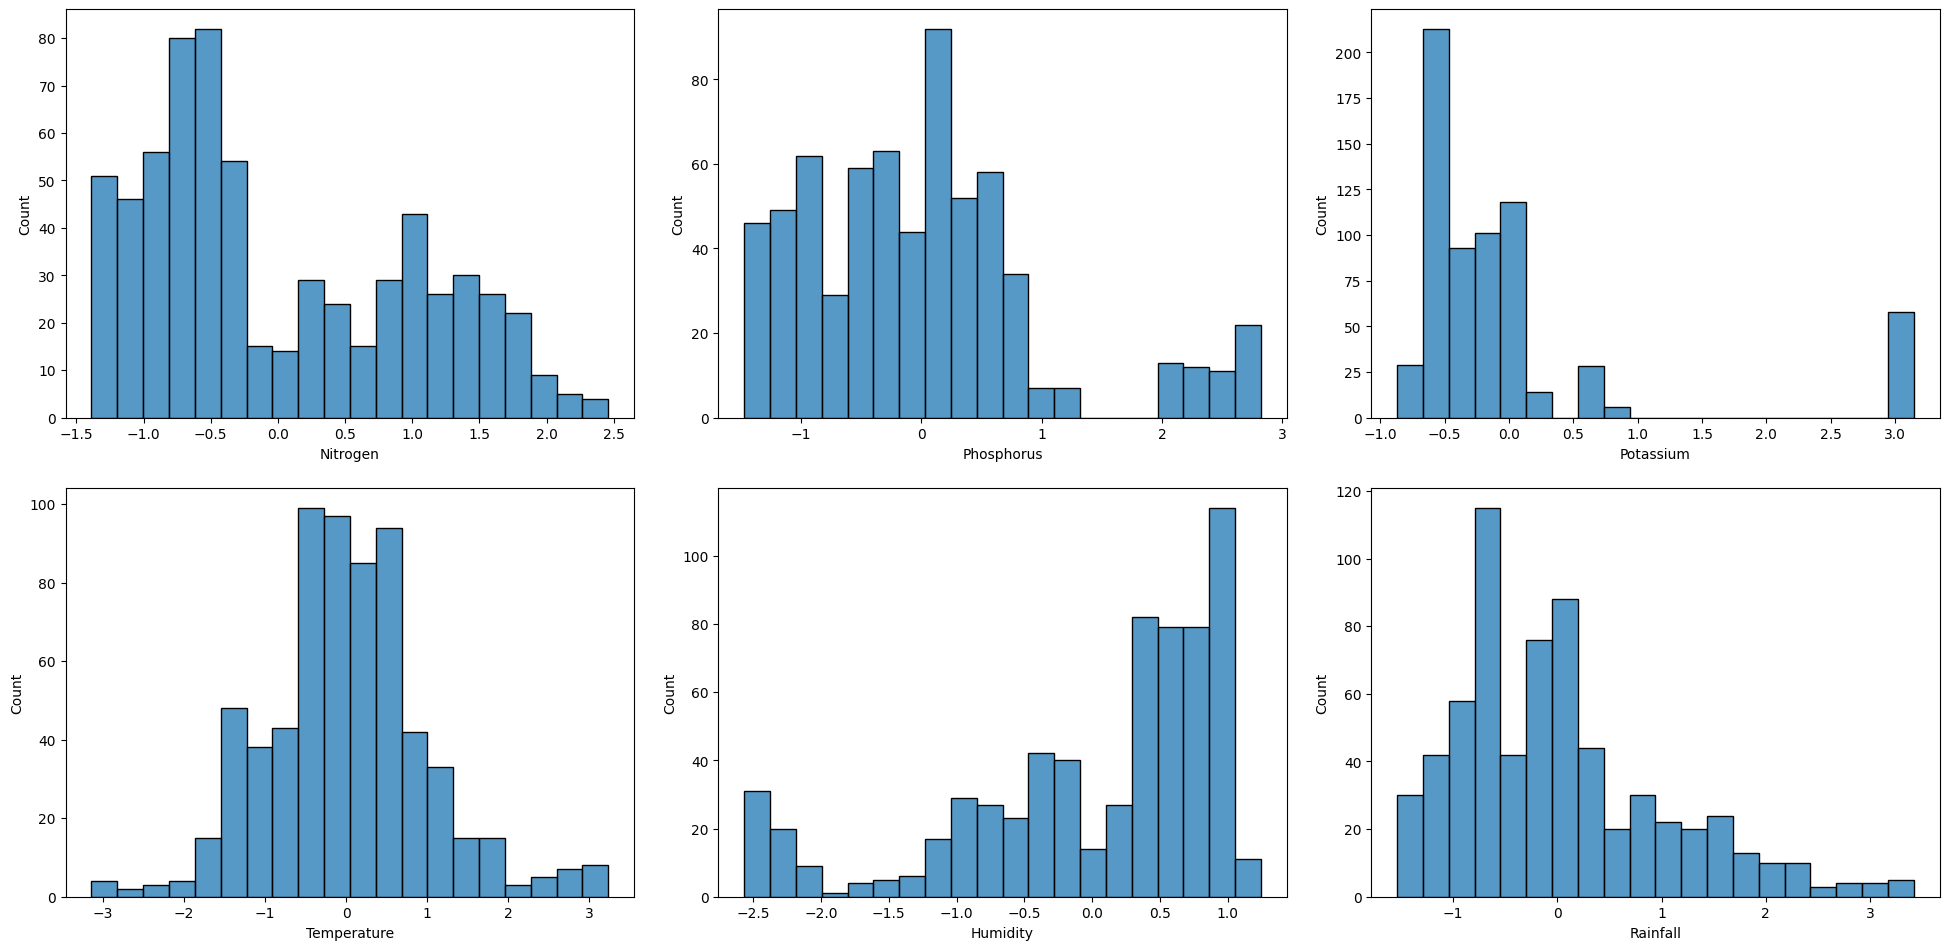

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
plt.tight_layout(pad=3)
sns.histplot(x_test_scaled["Nitrogen"],bins=20,ax=axes[0,0])
sns.histplot(x_test_scaled["Phosphorus"],bins=20,ax=axes[0,1])
sns.histplot(x_test_scaled["Potassium"],bins=20,ax=axes[0,2])
sns.histplot(x_test_scaled["Temperature"],bins=20,ax=axes[1,0])
sns.histplot(x_test_scaled["Humidity"],bins=20,ax=axes[1,1])
sns.histplot(x_test_scaled["Rainfall"],bins=20,ax=axes[1,2])